# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.335431e+01     1.755616e+01
 * time: 0.004303932189941406
     1     6.338382e+01     9.262604e+00
 * time: 0.12508296966552734
     2     5.719761e+01     1.263914e+01
 * time: 0.14315199851989746
     3     4.150138e+01     9.321110e+00
 * time: 0.1671769618988037
     4     3.161268e+01     8.330734e+00
 * time: 0.19140195846557617
     5     2.818289e+01     8.132036e+00
 * time: 0.21254205703735352
     6     1.301453e+01     2.984459e+00
 * time: 0.2340409755706787
     7     7.784234e+00     2.720963e+00
 * time: 0.3283500671386719
     8     7.000096e+00     2.572726e+00
 * time: 0.3476369380950928
     9     6.520986e+00     2.163034e+00
 * time: 0.36577606201171875
    10     6.182127e+00     2.823121e+00
 * time: 0.38031792640686035
    11     5.941917e+00     9.889774e-01
 * time: 0.39502406120300293
    12     5.761697e+00     9.685837e-01
 * time: 0.40935707092285156
    13     5.657127e+00     8.634146e-01
 * time: 0.

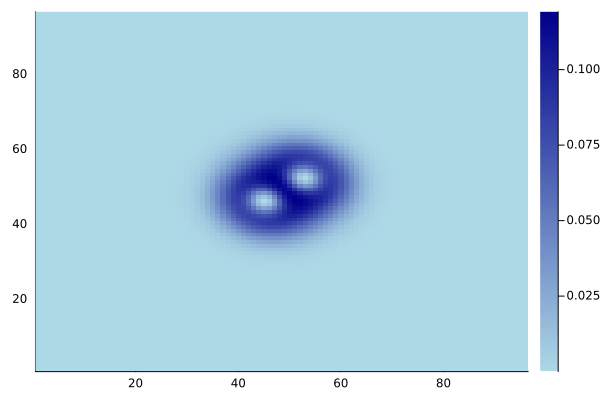

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)